In [1]:
import pyforest                                                                     # All popular libraries
import numpy                  as np                                                 # Basic library for calculation
import pandas                 as pd                                                 # Basic library for dataframe manipulation



import matplotlib.pyplot      as plt                                                # For plotting graphs
import seaborn                as sns                                                # For plotting graphs
sns.set(color_codes=True)                                                           # Adds nice background to the graphs
%matplotlib inline                                                                 

import scipy.stats            as stats                                              # Basic statistical library
import statsmodels.api        as sm                                                 # For statistical modelling

from   statsmodels.graphics.gofplots    import ProbPlot                             # For Probability plot and QQ plot
from   statsmodels.graphics.factorplots import interaction_plot                     # For interaction plot
from   statsmodels.stats.multicomp      import (pairwise_tukeyhsd,MultiComparison)  # For Tukey test
from   statsmodels.formula.api          import ols                                  # For n-way ANOVA
from   statsmodels.stats.anova          import _get_covariance,anova_lm             # For n-way ANOVA

from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
DF = pd.read_csv('SalaryData1.csv')

In [3]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(DF)
# profile.to_file(output_file="output10.html")
# profile.to_widgets()
# profile.to_notebook_iframe()

In [4]:
DF.head()

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


In [5]:
DF.tail()

,Education,Occupation,Salary
35,Bachelors,Exec-managerial,173935
36,Bachelors,Exec-managerial,212448
37,Bachelors,Exec-managerial,173664
38,Bachelors,Exec-managerial,212760
39,Doctorate,Exec-managerial,212781


In [6]:
DF.shape

(40, 3)

In [7]:
DF.describe()

,Salary
count,40.000000
mean,162186.875000
std,64860.407506
min,50103.000000
25%,99897.500000
50%,169100.000000
75%,214440.750000
max,260151.000000


In [8]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [9]:
DF['Education']= pd.Categorical(DF['Education'])
DF['Occupation']= pd.Categorical(DF['Occupation'])

In [10]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Education   40 non-null     category
 1   Occupation  40 non-null     category
 2   Salary      40 non-null     int64   
dtypes: category(2), int64(1)
memory usage: 864.0 bytes


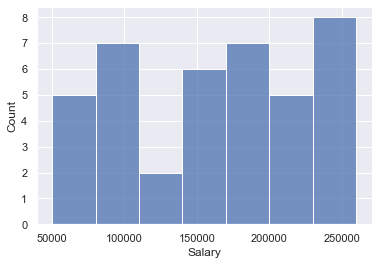

In [11]:
sns.histplot(DF['Salary']);

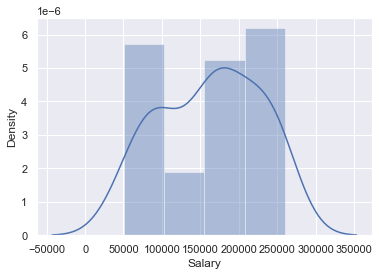

In [12]:
sns.distplot(DF['Salary']);

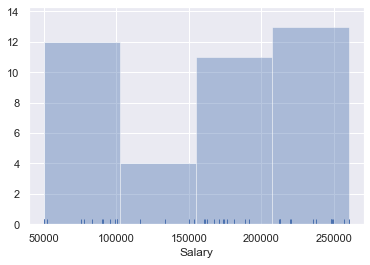

In [13]:
sns.distplot(DF['Salary'], kde=False, rug=True);

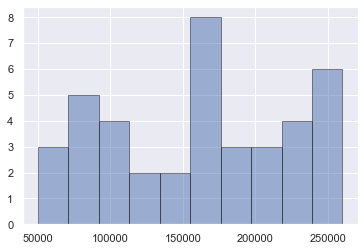

In [14]:
plt.hist(DF.Salary,density=False,histtype='bar',color='b',edgecolor='k',alpha=0.5);
plt.show()

<AxesSubplot:xlabel='Salary'>

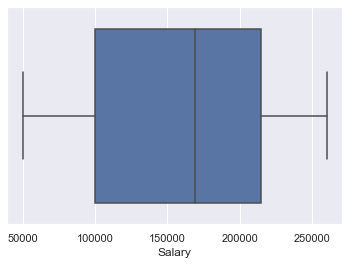

In [15]:
sns.boxplot(DF['Salary'])

In [16]:
# Coming to Education

In [17]:
DF['Education'].value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

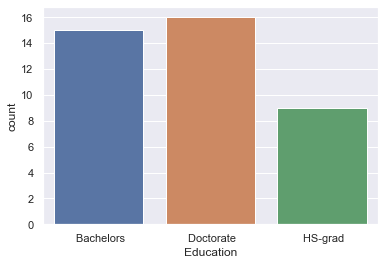

In [18]:
sns.countplot(DF['Education']);

In [19]:
DF.groupby("Education")["Salary"].mean()

Education
 Bachelors    165152.933333
 Doctorate    208427.000000
 HS-grad       75038.777778
Name: Salary, dtype: float64

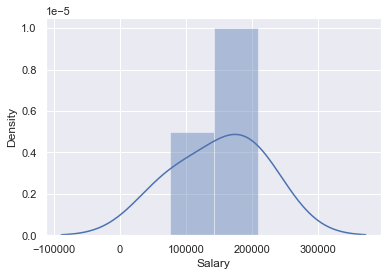

In [20]:
sns.distplot(DF.groupby("Education")["Salary"].mean());

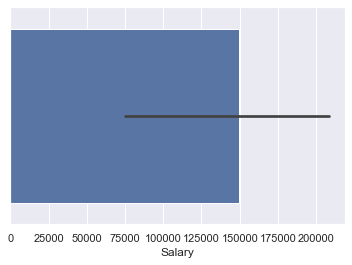

In [21]:
sns.barplot(DF.groupby("Education")["Salary"].mean());

In [22]:
DF.sort_values(by=['Salary'],ascending=False).head()

,Education,Occupation,Salary
25,Bachelors,Sales,260151
14,Doctorate,Prof-specialty,257345
11,Doctorate,Prof-specialty,249207
13,Doctorate,Prof-specialty,248871
9,Doctorate,Prof-specialty,248156


In [23]:
DF1=DF.sort_values(by='Education')
DF1

,Education,Occupation,Salary
19,Bachelors,Prof-specialty,90135
37,Bachelors,Exec-managerial,173664
36,Bachelors,Exec-managerial,212448
35,Bachelors,Exec-managerial,173935
25,Bachelors,Sales,260151
24,Bachelors,Sales,167431
23,Bachelors,Sales,191712
22,Bachelors,Sales,149909
21,Bachelors,Prof-specialty,133696
20,Bachelors,Prof-specialty,100135


In [24]:
DF2 = pd.read_excel('Degrees.xlsx')

In [25]:
DF2

,HS-grad,Bachelors,Doctorate
0,50103.0,90135.0,153197
1,52242.0,173664.0,248871
2,75333.0,212448.0,115945
3,77743.0,173935.0,175935
4,83203.0,260151.0,220754
5,90456.0,167431.0,257345
6,100678.0,191712.0,170769
7,95469.0,149909.0,219420
8,50122.0,133696.0,212781
9,NaN,100135.0,160540


In [26]:
DF3= DF2.dropna()

In [27]:
DF3

,HS-grad,Bachelors,Doctorate
0,50103.0,90135.0,153197
1,52242.0,173664.0,248871
2,75333.0,212448.0,115945
3,77743.0,173935.0,175935
4,83203.0,260151.0,220754
5,90456.0,167431.0,257345
6,100678.0,191712.0,170769
7,95469.0,149909.0,219420
8,50122.0,133696.0,212781


In [28]:
t1, p1 = stats.shapiro(DF3['HS-grad'])
t2, p2 = stats.shapiro(DF3['Bachelors'])
t3, p3 = stats.shapiro(DF3['Doctorate'])

In [30]:
print(p1,p2, p3)

0.1783432960510254 0.9611656069755554 0.726436972618103


In [31]:
# Generally a test of normality, but here a sign of how Bachelors is the most dominant treatment and HS-grad the least

In [32]:
stats.levene(DF3['HS-grad'], DF3['Bachelors'], DF3['Doctorate'])

LeveneResult(statistic=1.5908261877690124, pvalue=0.22450429424334328)

In [33]:
#As p-value is high at 0.224, so we fail to reject null hypothesis and hold our assumption that variance in four groups is equal

In [34]:
#Apply one-way ANOVA

formula = 'Salary ~ C(Education)'             # + means
model = ols(formula, DF).fit()                # formula fitted into ordinary least squares, algorithm formula put into a model

# calculates sums of squares and means sums of squares amd p-value etc.

aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


In [35]:
# Since the p value is less than the significance level, we can reject the null hupothesis and say that there is a difference
# in the mean salaries of different educational-qualificafion groups

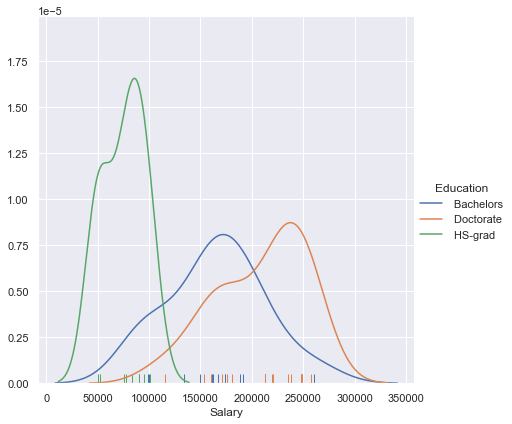

In [36]:
g = sns.FacetGrid(DF, hue="Education", height=6);
g = g.map(sns.distplot, "Salary",  hist=False, rug=True);
g.add_legend();

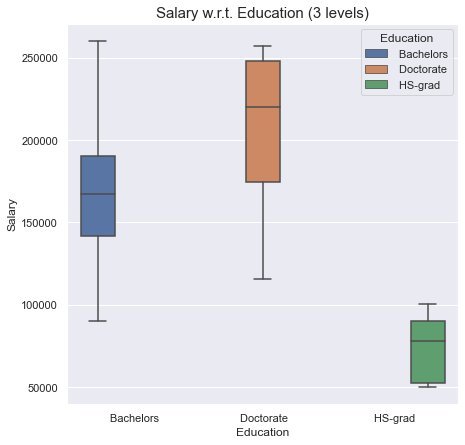

In [37]:
a4_dims = (7,7)
fig, ax = plt.subplots(figsize=a4_dims)
a = sns.boxplot(x= "Education", y = 'Salary', data = DF, hue = 'Education')
a.set_title("Salary w.r.t. Education (3 levels)",fontsize=15)
plt.show()

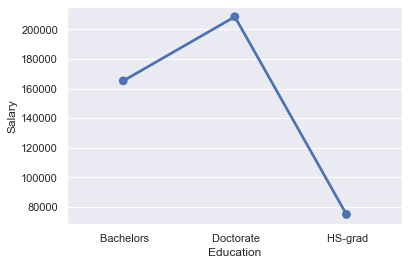

In [38]:
sns.pointplot(x='Education', y='Salary', data=DF, ci=None);
#, order=['HS-grad', 'Bachelors', 'Doctorate'], hue_order=[3,1,2]

In [39]:
# Posthoc test: Tukey test
MultiComp=MultiComparison(DF['Salary'],DF['Education'])
print(MultiComp.tukeyhsd().summary())

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------------
 Bachelors  Doctorate   43274.0667 0.0146    7541.1439  79006.9894   True
 Bachelors    HS-grad  -90114.1556  0.001 -132035.1958 -48193.1153   True
 Doctorate    HS-grad -133388.2222  0.001 -174815.0876 -91961.3569   True
-------------------------------------------------------------------------


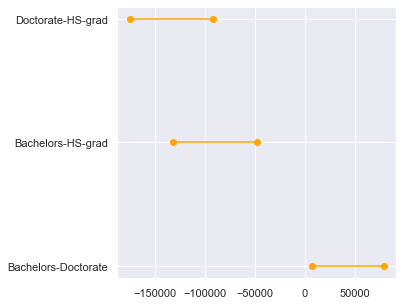

In [40]:
#for family wise comparison
results = MultiComp.tukeyhsd()
df=results.summary()
results_as_html = df.as_html()
df1=pd.read_html(results_as_html, header=0, index_col=0)[0].reset_index()
groups = np.array([df1.group1+ '-'+ df1.group2])

plt.figure(figsize=(5,5))
data_dict = {}
data_dict['category'] = groups.ravel()
data_dict['lower'] = results.confint[:,0]
data_dict['upper'] = results.confint[:,1]
dataset = pd.DataFrame(data_dict)

for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(dataset))):
 plt.plot((lower,upper),(y,y),'ro-',color='orange')
plt.yticks(range(len(dataset)),list(dataset['category']));

In [41]:
# Coming to occupation

In [42]:
DF['Occupation'].value_counts()

 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64

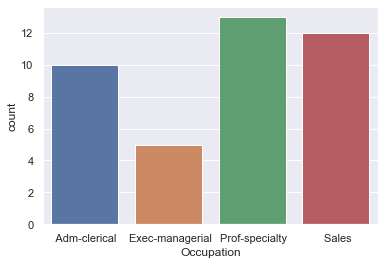

In [43]:
sns.countplot(DF['Occupation']);

In [44]:
DF.groupby("Occupation")["Salary"].mean()

Occupation
 Adm-clerical       141424.300000
 Exec-managerial    197117.600000
 Prof-specialty     168953.153846
 Sales              157604.416667
Name: Salary, dtype: float64

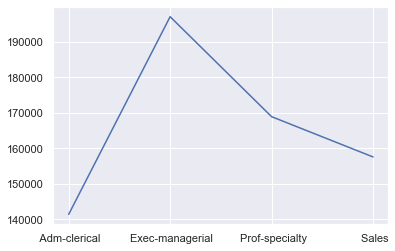

In [45]:
# sns.kdeplot(DF.groupby("Occupation")["Salary"].mean());
plt.plot(DF.groupby("Occupation")["Salary"].mean());

In [46]:
DF.groupby("Occupation")["Salary"].mean()

Occupation
 Adm-clerical       141424.300000
 Exec-managerial    197117.600000
 Prof-specialty     168953.153846
 Sales              157604.416667
Name: Salary, dtype: float64

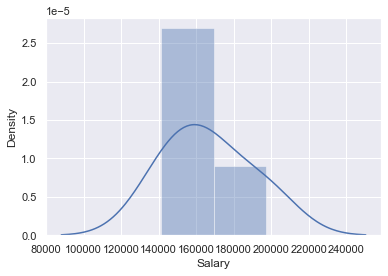

In [47]:
sns.distplot(DF.groupby("Occupation")["Salary"].mean());

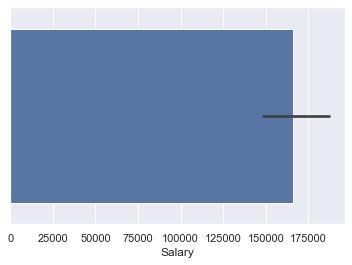

In [48]:
sns.barplot(DF.groupby("Occupation")["Salary"].mean());

In [49]:
DF4 = pd.read_excel('Jobs.xlsx')

In [50]:
DF4

,Adm-clerical,Exec-managerial,Prof-specialty,Sales
0,153197.0,173664.0,248871,149909.0
1,115945.0,212448.0,95469,170769.0
2,175935.0,173935.0,100678,219420.0
3,220754.0,212760.0,90456,237920.0
4,83203.0,212781.0,248156,180934.0
5,77743.0,NaN,257345,52242.0
6,75333.0,NaN,90135,50103.0
7,188729.0,NaN,235334,260151.0
8,162494.0,NaN,100135,167431.0
9,160910.0,NaN,249207,191712.0


In [51]:
DF5= DF4.dropna()

In [52]:
DF5

,Adm-clerical,Exec-managerial,Prof-specialty,Sales
0,153197.0,173664.0,248871,149909.0
1,115945.0,212448.0,95469,170769.0
2,175935.0,173935.0,100678,219420.0
3,220754.0,212760.0,90456,237920.0
4,83203.0,212781.0,248156,180934.0


In [53]:
t1, p1 = stats.shapiro(DF5['Adm-clerical'])
t2, p2 = stats.shapiro(DF5['Exec-managerial'])
t3, p3 = stats.shapiro(DF5['Prof-specialty'])
t4, p4 = stats.shapiro(DF5['Sales'])

In [54]:
print(p1, p2, p3, p4)

0.9848917722702026 0.007539781276136637 0.014669601805508137 0.7213752269744873


In [56]:
stats.levene(DF5['Adm-clerical'], DF5['Exec-managerial'], DF5['Prof-specialty'], DF5['Sales'])

LeveneResult(statistic=0.9966049847648979, pvalue=0.41967870017126496)

In [57]:
# As p-value is high at 0.419, so we fail to reject null hypothesis and hold our assumption that variance in four groups is equal

In [58]:
#Apply one-way ANOVA

formula = 'Salary ~ C(Occupation)'           # + means and
model = ols(formula, DF).fit()               # formula fitted into ordinary least squares, algorithm formula put into a model

# calculates sums of squares and means sums of square amd p-value etc.

aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


In [59]:
# Based on the ANOVA test we, therefore, fail to reject the null hypothesis that the four population means are identical.

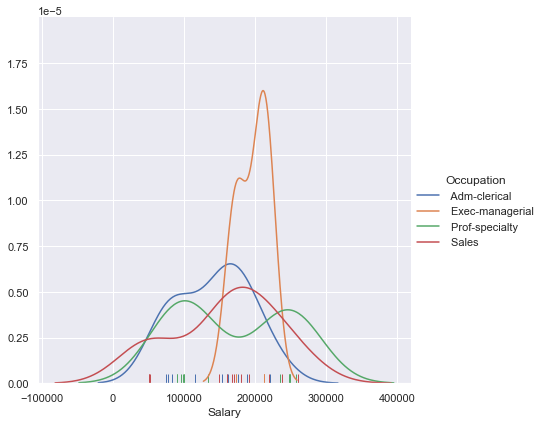

In [60]:
g = sns.FacetGrid(DF, hue="Occupation", height=6);
g = g.map(sns.distplot, "Salary",  hist=False, rug=True);
g.add_legend();

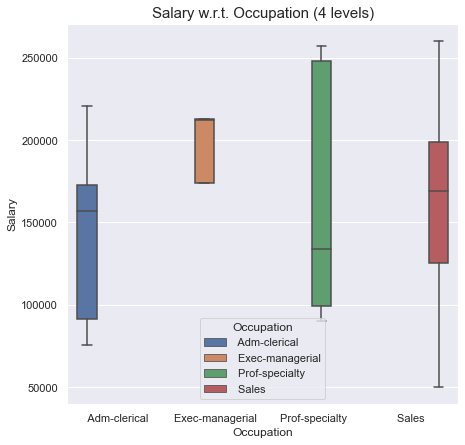

In [61]:
a4_dims = (7,7)
fig, ax = plt.subplots(figsize=a4_dims)
a = sns.boxplot(x= "Occupation", y = 'Salary', data = DF, hue = 'Occupation')
a.set_title("Salary w.r.t. Occupation (4 levels)",fontsize=15)
plt.show()

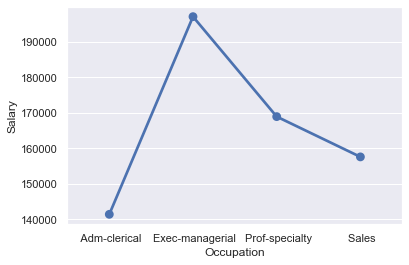

In [62]:
sns.pointplot(x='Occupation', y='Salary', data=DF, ci=None);

In [63]:
# Posthoc test: Tukey test
MultiComp=MultiComparison(DF['Salary'],DF['Occupation'])
print(MultiComp.tukeyhsd().summary())

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
     group1           group2        meandiff  p-adj     lower        upper    reject
------------------------------------------------------------------------------------
    Adm-clerical  Exec-managerial     55693.3 0.4146  -40415.1459 151801.7459  False
    Adm-clerical   Prof-specialty  27528.8538 0.7252  -46277.4011 101335.1088  False
    Adm-clerical            Sales  16180.1167    0.9  -58951.3115  91311.5449  False
 Exec-managerial   Prof-specialty -28164.4462 0.8263 -120502.4542  64173.5618  False
 Exec-managerial            Sales -39513.1833 0.6507 -132913.8041  53887.4374  False
  Prof-specialty            Sales -11348.7372    0.9  -81592.6398  58895.1655  False
------------------------------------------------------------------------------------


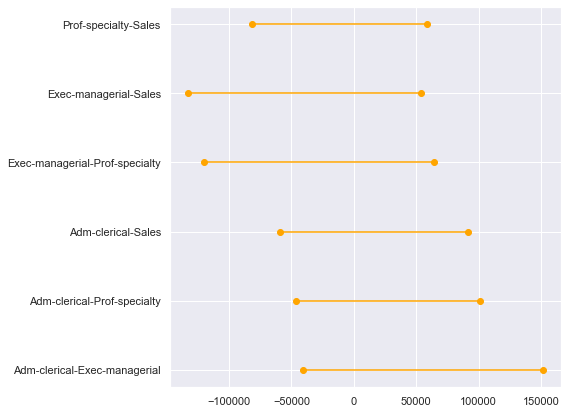

In [64]:
#for family wise comparison
results = MultiComp.tukeyhsd()
df2=results.summary()
results_as_html = df2.as_html()
df3=pd.read_html(results_as_html, header=0, index_col=0)[0].reset_index()
groups = np.array([df3.group1+ '-'+ df3.group2])

plt.figure(figsize=(7,7))
data_dict = {}
data_dict['category'] = groups.ravel()
data_dict['lower'] = results.confint[:,0]
data_dict['upper'] = results.confint[:,1]
dataset = pd.DataFrame(data_dict)

for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(dataset))):
 plt.plot((lower,upper),(y,y),'ro-',color='orange')
plt.yticks(range(len(dataset)),list(dataset['category']));

In [65]:
# 2-Way Anova

In [66]:
pd.crosstab(DF['Education'],DF['Occupation'])

Occupation,Adm-clerical,Exec-managerial,Prof-specialty,Sales
Education,,,,
Bachelors,3,4,4,4
Doctorate,4,1,6,5
HS-grad,3,0,3,3


In [67]:
DF.groupby(['Education','Occupation'])['Salary'].mean()

Education   Occupation      
 Bachelors   Adm-clerical       170711.000000
             Exec-managerial    193201.750000
             Prof-specialty     105787.750000
             Sales              192300.750000
 Doctorate   Adm-clerical       166457.750000
             Exec-managerial    212781.000000
             Prof-specialty     247772.833333
             Sales              193916.600000
 HS-grad     Adm-clerical        78759.666667
             Exec-managerial              NaN
             Prof-specialty      95534.333333
             Sales               50822.333333
Name: Salary, dtype: float64

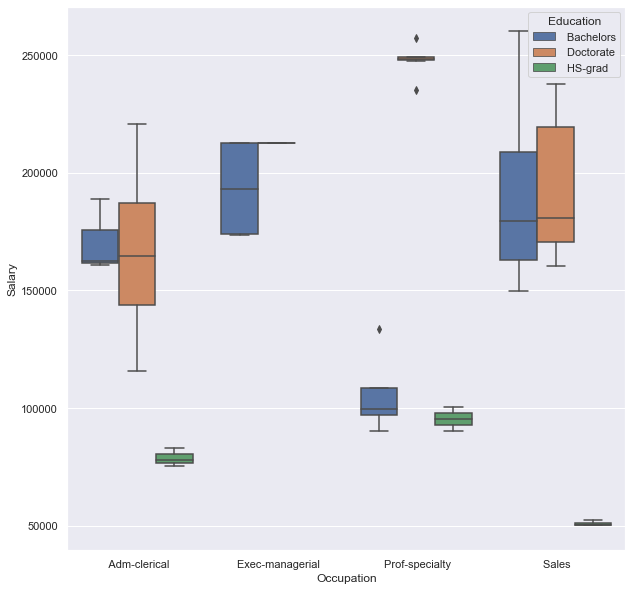

In [68]:
fig, axes = plt.subplots()
fig.set_size_inches(10,10)
a = sns.boxplot(data = DF, y = "Salary", x = "Occupation" , hue = 'Education', orient = "v")

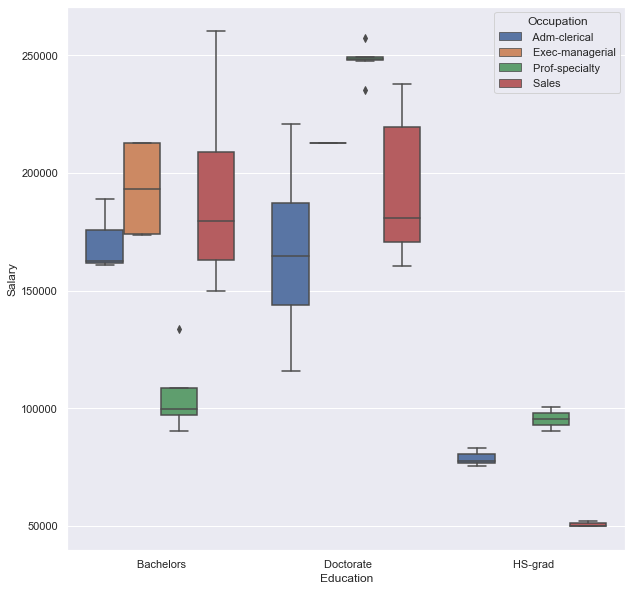

In [69]:
fig, axes = plt.subplots()
fig.set_size_inches(10,10)
a = sns.boxplot(data = DF, y = "Salary", x = "Education" , hue = 'Occupation', orient = "v")

In [70]:
formula = 'Salary ~ C(Education) + C(Occupation)' # + means and
model = ols(formula, DF).fit() # formula fitted into ordinary least squares, algorithm formula put into a model
# calculates sums of squares and means sums of square amd p-value etc.
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq          F        PR(>F)
C(Education)    2.0  1.026955e+11  5.134773e+10  31.257677  1.981539e-08
C(Occupation)   3.0  5.519946e+09  1.839982e+09   1.120080  3.545825e-01
Residual       34.0  5.585261e+10  1.642724e+09        NaN           NaN


In [71]:
formula = 'Salary ~ C(Education) + C(Occupation) + C(Education):C(Occupation)'
# : represents interaction
model = ols(formula, DF).fit()
aov_table = anova_lm(model, type=3)
print(aov_table)

                              df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN  


In [72]:
#Method 2
# mod =ols('Salary ~ Education*Occupation', data = DF).fit()
# aov_tbl = sm.stats.anova_lm(mod, type = 3)
# print(aov_tbl)

In [73]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     20.17
Date:                Sat, 22 May 2021   Prob (F-statistic):           1.82e-10
Time:                        04:35:45   Log-Likelihood:                -457.97
No. Observations:                  40   AIC:                             937.9
Df Residuals:                      29   BIC:                             956.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
Intercept                                                     1.707e+05   1.54e+04     11.088      0.000    1.39e+05    2.02e+05
C(Education)[T. Doctorate]                                   -4253.2500   2.04e+04     -0.209      0.836   -4.59e+04    3.74e+04
C(Education)[T. HS-grad]                                     -9.195e+04   2.18e+04     -4.223      0.000   -1.36e+05   -4.74e+04
C(Occupation)[T. Exec-managerial]                             2.249e+04   2.04e+04      1.104      0.279   -1.92e+04    6.41e+04
C(Occupation)[T. Prof-specialty]                             -6.492e+04   2.04e+04     -3.188      0.003   -1.07e+05   -2.33e+04
C(Occupation)[T. Sales]                                       2.159e+04   2.04e+04      1.060      0.298   -2.01e+04    6.32e+04
C(Education)[T. Doctorate]:C(Occupation)[T. Exec-managerial]  2.383e+04   3.61e+04      0.660      0.514      -5e+04    9.77e+04
C(Education)[T. HS-grad]:C(Occupation)[T. Exec-managerial]    3.206e-11    8.6e-12      3.728      0.001    1.45e-11    4.97e-11
C(Education)[T. Doctorate]:C(Occupation)[T. Prof-specialty]   1.462e+05   2.67e+04      5.484      0.000    9.17e+04    2.01e+05
C(Education)[T. HS-grad]:C(Occupation)[T. Prof-specialty]      8.17e+04   2.98e+04      2.740      0.010    2.07e+04    1.43e+05
C(Education)[T. Doctorate]:C(Occupation)[T. Sales]            5869.1000   2.71e+04      0.217      0.830   -4.96e+04    6.13e+04
C(Education)[T. HS-grad]:C(Occupation)[T. Sales]             -4.953e+04   2.98e+04     -1.661      0.107   -1.11e+05    1.14e+04
==============================================================================
Omnibus:                        7.354   Durbin-Watson:                   2.514
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                6.580
Skew:                           0.686   Prob(JB):                       0.0373
Kurtosis:                       4.437   Cond. No.                     2.08e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.42e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [74]:
DF_q=DF

In [75]:
DF_q

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769
5,Doctorate,Sales,219420
6,Doctorate,Sales,237920
7,Doctorate,Sales,160540
8,Doctorate,Sales,180934
9,Doctorate,Prof-specialty,248156


In [76]:
ind_value = np.arange(1,41)

In [77]:
ind_value = pd.DataFrame(ind_value)

In [78]:
ind_value.shape

(40, 1)

In [79]:
DF_q.insert(1, 'IDN', ind_value)

In [81]:
DF_q.head()

,Education,IDN,Occupation,Salary
0,Doctorate,1,Adm-clerical,153197
1,Doctorate,2,Adm-clerical,115945
2,Doctorate,3,Adm-clerical,175935
3,Doctorate,4,Adm-clerical,220754
4,Doctorate,5,Sales,170769


In [82]:
DF_q.tail()

,Education,IDN,Occupation,Salary
35,Bachelors,36,Exec-managerial,173935
36,Bachelors,37,Exec-managerial,212448
37,Bachelors,38,Exec-managerial,173664
38,Bachelors,39,Exec-managerial,212760
39,Doctorate,40,Exec-managerial,212781


In [83]:
# Grand means
#Education
print('Grand Mean',results.data.mean())
print(np.round(DF_q.groupby('Education').agg({'Salary':'mean','IDN':'count'}).T,2))
# index represents value counts

Grand Mean 162186.875
Education   Bachelors   Doctorate   HS-grad
Salary      165152.93    208427.0  75038.78
IDN             15.00        16.0      9.00


In [84]:
##  Occupation
print('Grand Mean',results.data.mean())
print(np.round(DF_q.groupby('Occupation').agg({'Salary':'mean','IDN':'count'}).T,2))

Grand Mean 162186.875
Occupation   Adm-clerical   Exec-managerial   Prof-specialty      Sales
Salary           141424.3          197117.6        168953.15  157604.42
IDN                  10.0               5.0            13.00      12.00


In [85]:
##  Education:Occupation
print(np.round(DF_q.groupby(['Occupation','Education']).agg({'Salary':'mean','IDN':'count'}),2))

                                Salary  IDN
Occupation       Education                 
 Adm-clerical     Bachelors  170711.00    3
                  Doctorate  166457.75    4
                  HS-grad     78759.67    3
 Exec-managerial  Bachelors  193201.75    4
                  Doctorate  212781.00    1
                  HS-grad          NaN    0
 Prof-specialty   Bachelors  105787.75    4
                  Doctorate  247772.83    6
                  HS-grad     95534.33    3
 Sales            Bachelors  192300.75    4
                  Doctorate  193916.60    5
                  HS-grad     50822.33    3


In [86]:
###  Posthoc test
MultiComp = MultiComparison(DF_q['Salary'],DF_q['Education'])
print(MultiComp.tukeyhsd().summary())
results = MultiComp.tukeyhsd()

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------------
 Bachelors  Doctorate   43274.0667 0.0146    7541.1439  79006.9894   True
 Bachelors    HS-grad  -90114.1556  0.001 -132035.1958 -48193.1153   True
 Doctorate    HS-grad -133388.2222  0.001 -174815.0876 -91961.3569   True
-------------------------------------------------------------------------


In [87]:
MultiComp = MultiComparison(DF_q['Salary'],DF_q['Occupation'])
print(MultiComp.tukeyhsd().summary())
results = MultiComp.tukeyhsd()

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
     group1           group2        meandiff  p-adj     lower        upper    reject
------------------------------------------------------------------------------------
    Adm-clerical  Exec-managerial     55693.3 0.4146  -40415.1459 151801.7459  False
    Adm-clerical   Prof-specialty  27528.8538 0.7252  -46277.4011 101335.1088  False
    Adm-clerical            Sales  16180.1167    0.9  -58951.3115  91311.5449  False
 Exec-managerial   Prof-specialty -28164.4462 0.8263 -120502.4542  64173.5618  False
 Exec-managerial            Sales -39513.1833 0.6507 -132913.8041  53887.4374  False
  Prof-specialty            Sales -11348.7372    0.9  -81592.6398  58895.1655  False
------------------------------------------------------------------------------------


In [ ]:
#Tukey's Multicomparison for a combination of factors
DF_q['combination'] = DF_q.Education + ':' + DF_q.Occupation
MultiComp = MultiComparison(DF_q['Salary'],DF_q['combination'])
print(MultiComp.tukeyhsd().summary())
results = MultiComp.tukeyhsd()

In [ ]:
#Threshold graph
df=results.summary()
results_as_html = df.as_html()
df1=pd.read_html(results_as_html, header=0, index_col=0)[0].reset_index()
groups = np.array([df1.group1+ '-'+ df1.group2])
plt.figure(figsize=(10,20))
data_dict = {}
data_dict['category'] = groups.ravel()
data_dict['lower'] = results.confint[:,0]
data_dict['upper'] = results.confint[:,1]
dataset = pd.DataFrame(data_dict)
for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(dataset))):
    plt.plot((lower,upper),(y,y),'ro-',color='orange')
    plt.yticks(range(len(dataset)),list(dataset['category']));

In [ ]:
#Interactions

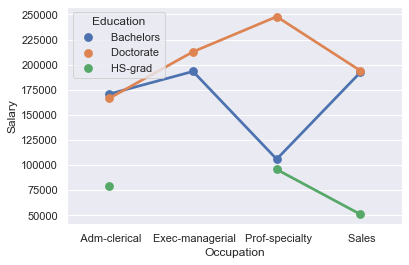

In [481]:
sns.pointplot(x='Occupation', y='Salary', data=DF_q, hue='Education', ci=None);

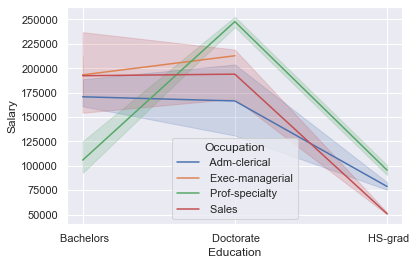

In [482]:
figsize=(20,35)
sns.lineplot(
    data=DF_q, x="Education", y="Salary",
    hue="Occupation",
    sizes=(.25, 2.5));

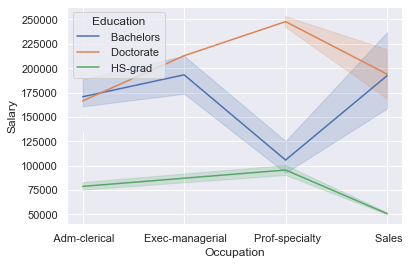

In [484]:
figsize=(20,35)
sns.lineplot(
    data=DF_q, x="Occupation", y="Salary",
    hue="Education",
    sizes=(.25, 2.5));

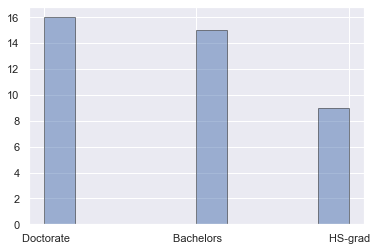

In [486]:
# plt.hist(DF_q.Education,density=False,histtype='bar',color='b',edgecolor='k',alpha=0.5);
# plt.show()

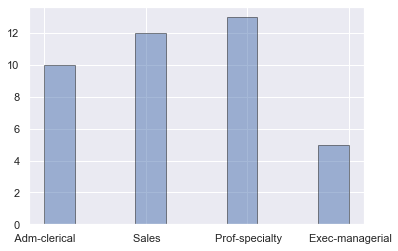

In [487]:
# plt.hist(DF_q.Occupation,density=False,histtype='bar',color='b',edgecolor='k',alpha=0.5);
# plt.show()

In [2]:
# Some more code that I want to try
DF = pd.read_csv('SalaryData1.csv')
from pandas_profiling import ProfileReport
profile = ProfileReport(DF)
profile.to_file(output_file="output10.html")
profile.to_widgets()
profile.to_notebook_iframe()

<IPython.core.display.Javascript object>

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
# Let's take a closer look at the Boxplot, and calculate the measure of skewness and totalnumber of outlier values for various attributes through a function:
def summary(x):
    x_min = DF[x].min()
    x_max = DF[x].max()
    Q1 = DF[x].quantile(0.25)
    Q2 = DF[x].quantile(0.50)
    Q3 = DF[x].quantile(0.75)
    print(f'5 Point Summary of {x.capitalize()} Attribute:\n'
          f'{x.capitalize()}(min) : {x_min}\n'
          f'Q1                    : {Q1}\n'
          f'Q2(Median)            : {Q2}\n'
          f'Q3                    : {Q3}\n'
          f'{x.capitalize()}(max) : {x_max}')

    fig = plt.figure(figsize=(16, 10))
    plt.subplots_adjust(hspace = 0.6)
    sns.set_palette('pastel')
    
    plt.subplot(221)
    ax1 = sns.distplot(DF[x], color = 'r')
    plt.title(f'{x.capitalize()} Density Distribution')
    
    plt.subplot(222)
    ax2 = sns.violinplot(x = DF[x], palette = 'Accent', split = True)
    plt.title(f'{x.capitalize()} Violinplot')
    
    plt.subplot(223)
    ax2 = sns.boxplot(x=DF[x], palette = 'cool', width=0.7, linewidth=0.6)
    plt.title(f'{x.capitalize()} Boxplot')
    
    plt.subplot(224)
    ax3 = sns.kdeplot(DF[x], cumulative=True)
    plt.title(f'{x.capitalize()} Cumulative Density Distribution')
    
    plt.show()


def box_plot(x = 'Salary'):
    def add_values(bp, ax):
        """ This actually adds the numbers to the various points of the boxplots"""
        for element in ['whiskers', 'medians', 'caps']:
            for line in bp[element]:
                # Get the position of the element. y is the label you want
                (x_l, y),(x_r, _) = line.get_xydata()
                # Make sure datapoints exist 
                # (I've been working with intervals, should not be problem for this case)
                if not np.isnan(y): 
                    x_line_center = x_l + (x_r - x_l)/2
                    y_line_center = y  # Since it's a line and it's horisontal
                    # overlay the value:  on the line, from center to right
                    ax.text(x_line_center, y_line_center, # Position
                            '%.2f' % y, # Value (3f = 3 decimal float)
                            verticalalignment='center', # Centered vertically with line 
                            fontsize=12, backgroundcolor="white")

    fig, axes = plt.subplots(1, figsize=(4, 8))

    red_diamond = dict(markerfacecolor='r', marker='D')

    bp_dict = DF.boxplot(column = x, 
                             grid=True, 
                             figsize=(4, 8), 
                             ax=axes, 
                             vert = True, 
                             notch=False, 
                             widths = 0.7, 
                             showmeans = True, 
                             whis = 1.5,
                             flierprops = red_diamond,
                             boxprops= dict(linewidth=3.0, color='black'),
                             whiskerprops=dict(linewidth=3.0, color='black'),
                             return_type = 'dict')

    add_values(bp_dict, axes)

    plt.title(f'{x.capitalize()} Boxplot', fontsize=16)
    plt.ylabel(f'{x.capitalize()}', fontsize=14)
    plt.show()
    
    skew = DF[x].skew()
    Q1 = DF[x].quantile(0.25)
    Q3 = DF[x].quantile(0.75)
    IQR = Q3 - Q1
    total_outlier_num = ((DF[x] < (Q1 - 1.5 * IQR)) | (DF[x] > (Q3 + 1.5 * IQR))).sum()
    print(f'Mean {x.capitalize()} = {DF[x].mean()}')
    print(f'Median {x.capitalize()} = {DF[x].median()}')
    print(f'Skewness of {x}: {skew}.')
    print(f'Total number of outliers in {x} distribution: {total_outlier_num}.')

5 Point Summary of Salary Attribute:
Salary(min) : 50103
Q1                    : 99897.5
Q2(Median)            : 169100.0
Q3                    : 214440.75
Salary(max) : 260151


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Aditya Rishi\Anaconda\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

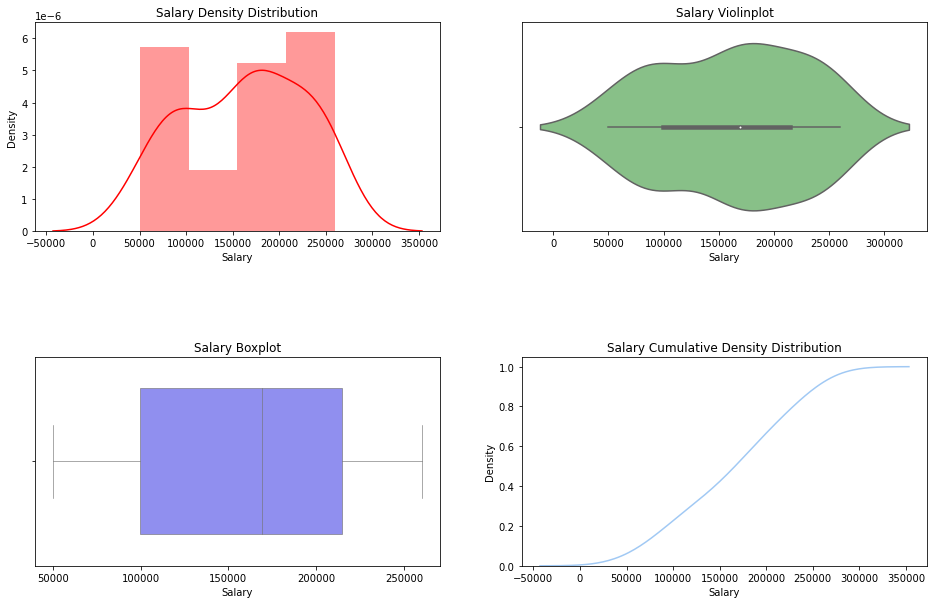

In [5]:
summary('Salary')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

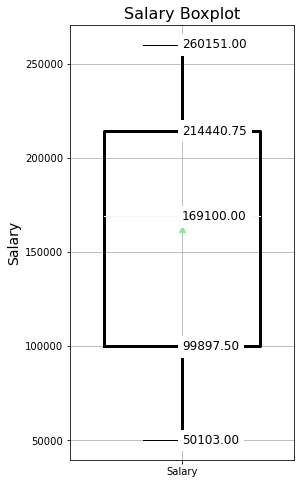

Mean Salary = 162186.875
Median Salary = 169100.0
Skewness of Salary: -0.17311792431161363.
Total number of outliers in Salary distribution: 0.


In [6]:
box_plot('Salary')

In [ ]:
# Not used

In [ ]:
#Aussmption 1: Normality

# w, p_value = stats.shapiro(DF['Salary'])
# print("W = {}".format(w), "p_value = {}".format(p_value))

In [ ]:
# Since p-value of the test is very low, we reject the null hypothesis that the response follows a normal distribution

In [ ]:
# 𝐻0:𝜎1=𝜎2=𝜎3 against 𝐻𝑎: At least one varianceis different from the rest

In [ ]:
#Aussmption 2: Homogeneity of Variance
# statistic, p_value = stats.levene(DF['Salary'][DF['Education']=="Bachelors"],
#                                    DF['Salary'][DF['Education']=="Doctorate"],
#                                    DF['Salary'][DF['Education']=="HS-grad"])
#print("statistic = {}".format(statistic), "p_value = {}".format(p_value))

In [ ]:
# Based on the ANOVA test we, therefore, reject the null hypothesis that the three population means are identical.
# At least for one Education level, the mean salary is different from the rest

In [ ]:
# Code for residuals
# model values
# model_fitted_y = mod.fittedvalues
# model residuals
# model_residuals = mod.resid
# normalized residuals
# model_norm_residuals = mod.get_influence().resid_studentized_internal
# absolute squared normalized residuals
# model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
# model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
# model_leverage = mod.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
# model_cooks = mod.get_influence().cooks_distance[0]

# plot_lm_1 = plt.figure()
# plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'Salary', data=DF,
#                                                           lowess=True,
#                                                           scatter_kws={'alpha': 0.5},
#                                                           line_kws={'color': 'red', 'lw': 1, 'alpha': 0.5})
# 
# plot_lm_1.axes[0].set_title('Residuals vs Fitted')
# plot_lm_1.axes[0].set_xlabel('Fitted values')
# plot_lm_1.axes[0].set_ylabel('Residuals')

In [ ]:
#QQ = ProbPlot(model_norm_residuals)

In [ ]:
#plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
#plot_lm_2.axes[0].set_title('Normal Q-Q')
#plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
#plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
#abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
#abs_norm_resid_top_3 = abs_norm_resid[:3]
#for r, i in enumerate(abs_norm_resid_top_3):
#    plot_lm_2.axes[0].annotate(i,xy=(np.flip(QQ.theoretical_quantiles, 0)[r],model_norm_residuals[i])) 

In [ ]:
#Aussmption 2: Homogeneity of Variance
#statistic, p_value = stats.levene(DF['Salary'][DF['Occupation']=="Adm-clerical"],
#                                    DF['Salary'][DF['Occupation']=="Exec-managerial"],
#                                    DF['Salary'][DF['Occupation']=="Prof-specialty"],
#                                    DF['Salary'][DF['Occupation']=="Sales"])
# print("statistic = {}".format(statistic), "p_value = {}".format(p_value))

In [ ]:
# Based on the ANOVA test we, therefore, fail to reject the null hypothesis that the three population means are identical.

In [ ]:
#QQ = ProbPlot(model_norm_residuals)

In [ ]:
#generate Q-Q plot for the dataset
#plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
#plot_lm_2.axes[0].set_title('Normal Q-Q')
#plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
#plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
#abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
#abs_norm_resid_top_3 = abs_norm_resid[:3]
#for r, i in enumerate(abs_norm_resid_top_3):
#    plot_lm_2.axes[0].annotate(i,xy=(np.flip(QQ.theoretical_quantiles, 0)[r],model_norm_residuals[i]))

In [ ]:
### Multiple comparison tests for 𝑋2: Occupation
### In order to identify for which Occupation mean, Salary is different from others, the 
### hypotheses may be stated as:
### 𝐻0: All pairs of group means are equal against 𝐻𝑎: At least one group mean is different from 
### the rest.
### We may also rewrite the null and alternative hypotheses as
### 𝐻0: 𝜇𝑖 = 𝜇𝑗 against 𝐻𝑎: 𝜇𝑖 ≠ 𝜇𝑗
### , for all 𝑖 ≠ 𝑗, 𝑖,𝑗 = 1, 2, 3, 4. Subscript 1 represents Adm-clerical, 
### 2 Exec-managerial, 3 Prof-spcecialty and 4 Sales.
### Similarly, multiple comparison tests for 𝑋1: Education
### This will use a, b, and c as codes for HS-grad, Bachelors, and Doctorate, respectively for threshold plot 

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
fig = interaction_plot(x=DF_q['Occupation'], trace=DF_q['Education'],
                       response=DF_q['Salary'], colors=['r', 'b','g','y'],
                       ylabel='Salary', xlabel='Occupation', ax=ax)
plt.show()

In [ ]:
# P_value is high
# Education and occupation have high interactivity